In [ ]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
import numpy as np
from chainconsumer import ChainConsumer
#from corner import corner

/u/ki/swmclau2/.local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
! ls -lt /u/ki/swmclau2/des/PearceMCMC/*chain*cosmo*.npy

-rw-r--r-- 1 swmclau2 des 1380000063 Nov  9 14:01 /u/ki/swmclau2/des/PearceMCMC/500_walkers_10000_steps_chain_cosmo_zheng_xi_lowmsat.npy
-rw-r--r-- 1 swmclau2 des   44100030 Nov  7 21:47 /u/ki/swmclau2/des/PearceMCMC/500_walkers_10000_steps_chain_cosmo_zheng_xi_lowmsat_fixedCosmo.npy
-rw-r--r-- 1 swmclau2 des  248160034 Nov  7 20:52 /u/ki/swmclau2/des/PearceMCMC/500_walkers_10000_steps_chain_cosmo_zheng_xi_lowmsat_fixedHOD.npy
-rw-r--r-- 1 swmclau2 des   50512034 Nov  7 17:00 /u/ki/swmclau2/des/PearceMCMC/500_walkers_10000_steps_chain_cosmo_zheng_xi_lowmsat_fixedHOD_v3.npy
-rw-r--r-- 1 swmclau2 des   67144034 Nov  7 16:27 /u/ki/swmclau2/des/PearceMCMC/500_walkers_10000_steps_chain_cosmo_zheng_xi_lowmsat_fixedHOD_v2.npy
-rw-r--r-- 1 swmclau2 des  125000007 Nov  5 18:33 /u/ki/swmclau2/des/PearceMCMC/500_walkers_10000_steps_chain_cosmo_zheng_xi_lowmsat_fixed_omch2.npy
-rw-r--r-- 1 swmclau2 des   80730063 Nov  5 05:49 /u/ki/swmclau2/des/PearceMCMC/500_walkers_10000_steps_chain_cosmo_zheng_

In [4]:
! du /u/ki/swmclau2/des/PearceMCMC/*chain*cosmo*.npy -sh

27M	/u/ki/swmclau2/des/PearceMCMC/100_walkers_1000_steps_chain_cosmo_zheng_xi.npy
2.7M	/u/ki/swmclau2/des/PearceMCMC/100_walkers_100_steps_chain_cosmo_zheng_xi.npy
4.2M	/u/ki/swmclau2/des/PearceMCMC/100_walkers_5000_steps_chain_cosmo_zheng_xi_fixed_cosmo.npy
23M	/u/ki/swmclau2/des/PearceMCMC/100_walkers_5000_steps_chain_cosmo_zheng_xi_fixed_hod.npy
264M	/u/ki/swmclau2/des/PearceMCMC/200_walkers_5000_steps_chain_cosmo_zheng_xi.npy
276K	/u/ki/swmclau2/des/PearceMCMC/20_walkers_5000_steps_chain_cosmo_zheng_xi_fixed_H0.npy
1008K	/u/ki/swmclau2/des/PearceMCMC/20_walkers_5000_steps_chain_cosmo_zheng_xi_fixed_alpha.npy
464K	/u/ki/swmclau2/des/PearceMCMC/20_walkers_5000_steps_chain_cosmo_zheng_xi_fixed_hod.npy
416K	/u/ki/swmclau2/des/PearceMCMC/20_walkers_5000_steps_chain_cosmo_zheng_xi_fixed_logM1.npy
984K	/u/ki/swmclau2/des/PearceMCMC/20_walkers_500_steps_chain_cosmo_zheng_xi_fixed_cosmo.npy
1.7M	/u/ki/swmclau2/des/PearceMCMC/20_walkers_500_steps_chain_cosmo_zheng_xi_fixed_hod.npy
1.3G	/u/ki

In [5]:
#fname = 'ab_sham_chain.npy'
#fname = '/u/ki/swmclau2/des/PearceMCMC/chain.npy'
fname = '/u/ki/swmclau2/des/PearceMCMC/500_walkers_10000_steps_chain_cosmo_zheng_xi_lowmsat.npy'

In [6]:
chain = np.genfromtxt(fname)

In [7]:
chain.shape

(5000000, 11)

In [8]:
n_walkers = 500
n_params = chain.shape[1] if len(chain.shape) > 1 else 1

In [9]:
#c = chain.reshape((n_walkers, -1, n_params))
n_burn = 100
chain = chain[n_walkers*n_burn:]#, :]
#c = chain.reshape((-1, n_walkers, n_params))

#chain = c[:,:, :].reshape((-1, n_params))
print chain.shape, chain.shape[0]/n_walkers

(4950000, 11) 9900


In [10]:
MAP = chain.mean(axis = 0)
print MAP

[ 2.83803431e+00  1.41292022e+01  1.35394100e+01  6.85727937e+01
 -1.00279197e+00  3.09689629e+00  1.15974561e-01  1.88601276e-01
  1.00206447e+00  9.66233152e-01  2.21386617e-02]


In [11]:
param_names = [r'$N_{eff}$', r'$\log(M_0)$',r'$\log(M_1)$', r'$H_0$',r'$w_0$', r'$\ln(10A_s)$',  r'$\Omega_c h^2$',
               r'$\sigma_{\log M }$', r'$\alpha$',  r'$n_s$', r'$\Omega_b h^2$']

In [12]:
hod_param_names = [r'$\sigma_{\log M }$', r'$\log(M_0)$',r'$\log(M_1)$',r'$\alpha$' ]
cosmo_param_names = [r'$N_{eff}$', r'$H_0$', r'$w_0$', r'$\Omega_c h^2$',r'$\ln(10A_s)$',r'$n_s$',r'$\Omega_b h^2$' ]

In [13]:
chain.shape

(4950000, 11)

In [14]:
#fixed some params
#param_names = [r'$\log{M_{min}}$',r'$\sigma_{log{M}}$',r'$\log{M_1}$', r'$\alpha$']#, r'$\log{M_0}$', r'$\log{M_1}$', r'$\alpha$']

In [15]:
c = ChainConsumer()
c.add_chain(chain, walkers=n_walkers, parameters = param_names)
c.configure(statistics='cumulative')

In [16]:
#true_vals = np.array([12.9390382,12.51024343,  14.36144524,   0.73766725,  1.06822384])
#true_vals = np.array([12.9390382,0.0, 12.51024343,  14.36144524, 0.0,  0.73766725,  1.06822384])

In [17]:
from pearce.mocks import cat_dict
cosmo_params = {'simname':'testbox', 'boxno': 3, 'realization':0, 'scale_factors':[1.0], 'system': 'long'}
cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!

In [18]:
cpv = cat._get_cosmo_param_names_vals()

print  {key: val for key, val in zip(cpv[0], cpv[1])}

{'Neff': 3.7, 'H0': 70.7317, 'w0': -1.13151, 'omch2': 0.12283, 'ln10As': 3.11395, 'ns': 0.953515, 'ombh2': 0.0217629}


In [19]:
cosmo_true_vals = [3.7,70.7317,-1.13151, 0.12283,3.11395, 0.953515,  0.021762]

In [20]:
emulation_point = [('logM0', 14.0), ('sigma_logM', 0.2),
                    ('alpha', 1.083),('logM1', 13.7)]

In [21]:
hod_true_vals = [0.2, 14.0, 13.7, 1.083]
#hod_true_vals = [13.7, 14.0, 0.2, 1.083]

/u/ki/swmclau2/.local/lib/python2.7/site-packages/chainconsumer/helpers.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, be = np.histogram(data, weights=weight, bins=1000, normed=True)
/u/ki/swmclau2/.local/lib/python2.7/site-packages/chainconsumer/analysis.py:254: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, edges = np.histogram(data, bins=bins, normed=True, weights=weight

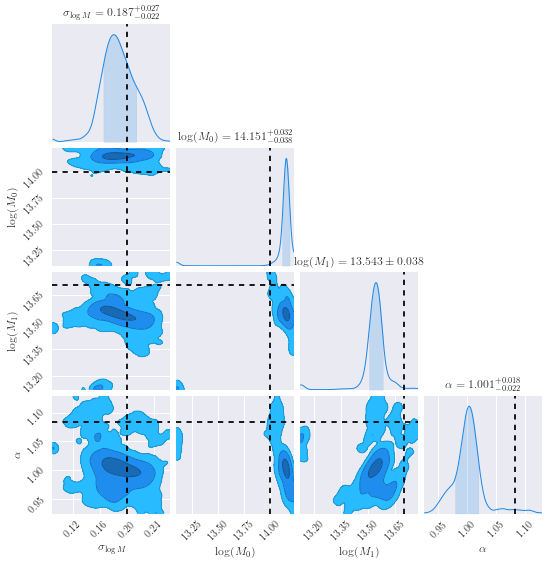

In [22]:
fig = c.plotter.plot(figsize=(8,8), parameters = hod_param_names, truth = hod_true_vals)# parameters = [param_names[i] for i in (1, 4)])
                    #, truth = true_vals)
fig.show()

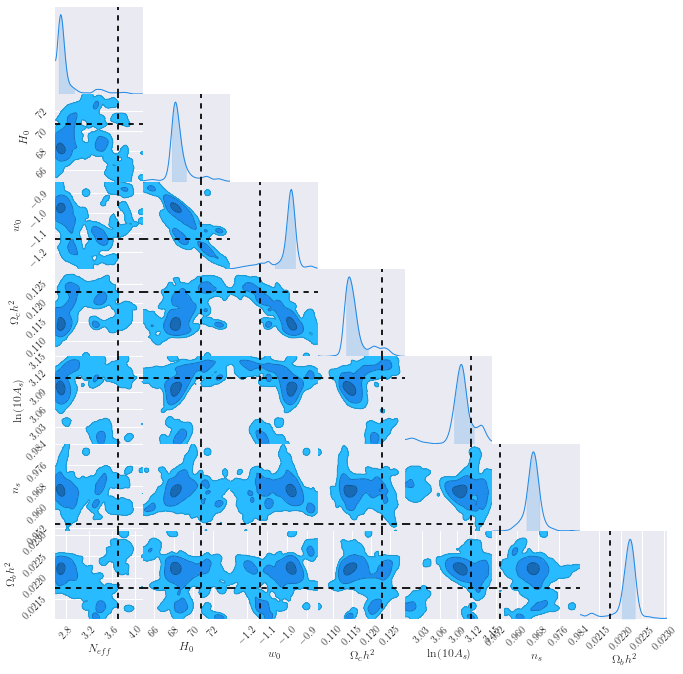

In [23]:
fig = c.plotter.plot(figsize=(10,10), parameters = cosmo_param_names, truth = cosmo_true_vals)# parameters = [param_names[i] for i in (1, 4)])
                    #, truth = true_vals)
fig.show()

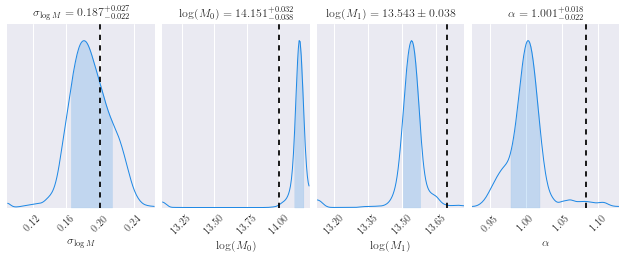

In [24]:
#c.configure(statistics='max')
fig = c.plotter.plot_distributions(figsize=(10, 3) ,parameters = hod_param_names, truth = hod_true_vals)
fig.show()

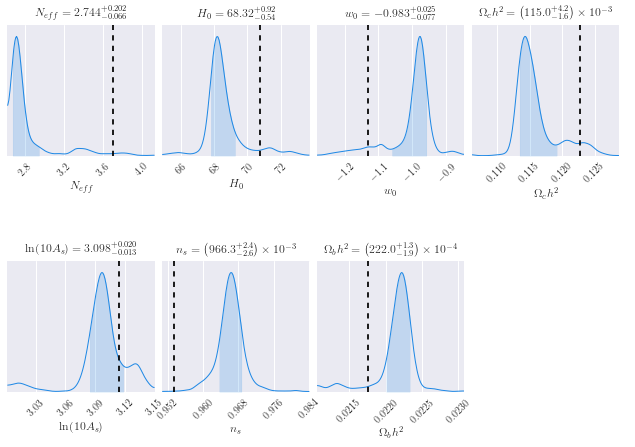

In [25]:
#c.configure(statistics='max')
fig = c.plotter.plot_distributions(figsize=(10, 6) , parameters = cosmo_param_names, truth = cosmo_true_vals)
fig.show()

In [26]:
gelman_rubin_converged = c.diagnostic.gelman_rubin()
print gelman_rubin_converged

Gelman-Rubin Statistic values for chain 0
$N_{eff}$: 1.00198 (Passed)
$\log(M_0)$: 1.00044 (Passed)
$\log(M_1)$: 1.00296 (Passed)
$H_0$: 1.00358 (Passed)
$w_0$: 1.00328 (Passed)
$\ln(10A_s)$: 1.00083 (Passed)
$\Omega_c h^2$: 1.00242 (Passed)
$\sigma_{\log M }$: 1.00475 (Passed)
$\alpha$: 1.00336 (Passed)
$n_s$: 1.00615 (Passed)
$\Omega_b h^2$: 1.00058 (Passed)
True


In [27]:
np.sqrt(np.diag(c.analysis.get_covariance()[1]))

array([2.69140711e-01, 1.43250170e-01, 6.85165614e-02, 1.19365383e+00,
       6.87582015e-02, 2.54725105e-02, 3.20008769e-03, 2.43849169e-02,
       2.79199467e-02, 3.21567530e-03, 2.83697971e-04])

In [28]:
summary  = c.analysis.get_summary()
for key, val in summary.iteritems():
    print key, val[1]

$\log(M_0)$ 14.150893091564047
$\ln(10A_s)$ 3.0979170792187216
$\alpha$ 1.0012438676638478
$n_s$ 0.9663047784313639
$\Omega_c h^2$ 0.11500779571717756
$w_0$ -0.9828754354383403
$N_{eff}$ 2.7436899620084945
$\sigma_{\log M }$ 0.18705624746061056
$\Omega_b h^2$ 0.022195875640021265
$H_0$ 68.32496859004542
$\log(M_1)$ 13.542580923036377


In [29]:
MAP = np.array([summary[p][1] for p in param_names])
print MAP

[ 2.74368996e+00  1.41508931e+01  1.35425809e+01  6.83249686e+01
 -9.82875435e-01  3.09791708e+00  1.15007796e-01  1.87056247e-01
  1.00124387e+00  9.66304778e-01  2.21958756e-02]


In [30]:
print param_names

['$N_{eff}$', '$\\log(M_0)$', '$\\log(M_1)$', '$H_0$', '$w_0$', '$\\ln(10A_s)$', '$\\Omega_c h^2$', '$\\sigma_{\\log M }$', '$\\alpha$', '$n_s$', '$\\Omega_b h^2$']
